<a href="https://colab.research.google.com/github/Elizabethav03/ds1002-ezu7cg/blob/main/Copy_of_lab2_race_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 2: Determine Race Results with R

In this lab you will work with a dataset, writing R to generate the deliverables specified in the cells below.

The dataset for this lab is made up of fictitious results from a road race. Runner information and results is provided in the data.

Answer the questions below with the appropriate R code. Point assignments are indicated for each section. There are 10 total points possible for this lab.

Useful reference material (check all R modules within the Canvas site for more help)
- [R Reference Material](https://canvas.its.virginia.edu/courses/78571/modules#module_219810).
- [Plots Samples](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/25-plots-in-r.ipynb)

## Group Submissions

If you are working in a group to complete this lab, you may have no more than 3 members to a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Elizabeth Albarran-Villa                    Computing ID ezu7cg

## 1. Load Libraries & Data (1 pt)

https://raw.githubusercontent.com/nmagee/ds1002/main/data/road-race.csv

Import any necessary libraries and load the remote CSV file below into a data frame.

In [17]:
# Loading the remote CSV file into a data frame
df <- read.csv("https://raw.githubusercontent.com/nmagee/ds1002/main/data/road-race.csv")

In [50]:
library(dplyr)
library(tidyr)

## 2. Get Summary Data (1 pt)

In code, display how many rows and columns are in the raw dataset.

In [51]:
# Thise shows that the raw dataset has 764 rows and 5 columns
df

runner_bib,runner_name,runner_age,runner_gender,finish_time,finish_minutes
<int>,<chr>,<int>,<chr>,<chr>,<drtn>
1,Loydie Lopes,17,Male,16:01,NA mins
2,Lorens Crispe,33,Male,15:40,NA mins
3,Shirline Hasser,22,Female,14:20,NA mins
4,Alleyn Hartshorn,39,Male,17:06,NA mins
5,Wang MacColl,50,Male,16:49,NA mins
6,Tonnie Tidder,44,Male,15:43,NA mins
7,Hermy Everal,51,Male,,NA mins
8,Basil Moxsom,44,Male,15:16,NA mins
9,Lark Bragge,30,Female,15:59,NA mins


## 3. Clean and Organize the Data (2 pts)

Check for data quality.

- Resolve any duplicate rows.
- If a runner does not have a finish time, they are DNF and should not be counted in the dataset.



In [52]:
# resolve any duplicate rows
df2 <- df %>% distinct()

# Replace empty strings with NA in the entire dataframe
df2[df2=="gg28"] <- NA
df2[df2=="gg29"] <- NA
df2[df2==""] <- NA

# filter DNF
df <- df %>% filter(!is.na(finish_time))


Now display the first 10 rows of the cleaned dataset.

In [53]:
# display first 10 rows of cleaned data
head(df2,10)

,runner_bib,runner_name,runner_age,runner_gender,finish_time,finish_minutes
,<int>,<chr>,<int>,<chr>,<chr>,<drtn>
1,1,Loydie Lopes,17,Male,16:01,NA mins
2,2,Lorens Crispe,33,Male,15:40,NA mins
3,3,Shirline Hasser,22,Female,14:20,NA mins
4,4,Alleyn Hartshorn,39,Male,17:06,NA mins
5,5,Wang MacColl,50,Male,16:49,NA mins
6,6,Tonnie Tidder,44,Male,15:43,NA mins
7,7,Hermy Everal,51,Male,NA,NA mins
8,8,Basil Moxsom,44,Male,15:16,NA mins
9,9,Lark Bragge,30,Female,15:59,NA mins


## 4. Calculate Elapsed Time (3 pts)

Using R, add a new column named `["finish_minutes"]` to the dataframe that calculates the number of minutes it took for the runner to complete the race. Ideally this is a column consisting of plain integers.

The starting gun was fired at precisely 12:00pm that day.

Note: This is calculated using a built-in function of R, `difftime()` which takes 3 parameters:

- End time
- Start time
- Units

The result is an output that figures the difference between the two: `3 days`, `14 years`, `112 mins`, etc.

The syntax for that function is below. Take care to use the proper order of parameters. The `as.POSIXct` casting makes it possible to read a long datetime in the `YYYY-MM-DDTHH:MM` format, a common `datetime` value. The `format` parameter specifies the pattern you are trying to read.

```
df$new-column <- (difftime( as.POSIXct(df$end-column, format="%Y-%m-%dT%H:%M"),
                            as.POSIXct(df$start-column, format="%Y-%m-%dT%H:%M"),
                            units="min"))
```

In [54]:
# Assuming df is your dataframe
df$finish_minutes <- (difftime(
  as.POSIXct(df$finish_time, format="%0-%0-%0%0:%0"),
  as.POSIXct("2023-01-01T12:00", format="%0-%0-%0%0:%0"),
  units="mins"
))

# Display the first 10 rows of the updated dataframe
head(df)

,runner_bib,runner_name,runner_age,runner_gender,finish_time,finish_minutes
,<int>,<chr>,<int>,<chr>,<chr>,<drtn>
1,1,Loydie Lopes,17,Male,16:01,NA mins
2,2,Lorens Crispe,33,Male,15:40,NA mins
3,3,Shirline Hasser,22,Female,14:20,NA mins
4,4,Alleyn Hartshorn,39,Male,17:06,NA mins
5,5,Wang MacColl,50,Male,16:49,NA mins
6,6,Tonnie Tidder,44,Male,15:43,NA mins


## 5. Identify Winners by Gender (2 pts)

Based on the minutes it took each runner to complete the race, identify the top three places for each gender.

There are several ways to do this, some of which require less code than others. You will only be graded for producing the correct output, not on how elegant/advanced your programming is.

In [60]:
#Grouping through gender
df_grouped <- df %>%
  group_by(runner_gender) %>%
  arrange(finish_minutes)

In [61]:
top <- df_grouped %>%
  slice_head(n = 3) %>%
  select(runner_gender, finish_minutes)

In [62]:
print(top)

# A tibble: 24 × 2
# Groups:   runner_gender [8]
   runner_gender finish_minutes
   <chr>         <drtn>        
 1 Agender       NA mins       
 2 Agender       NA mins       
 3 Agender       NA mins       
 4 Bigender      NA mins       
 5 Bigender      NA mins       
 6 Bigender      NA mins       
 7 Female        NA mins       
 8 Female        NA mins       
 9 Female        NA mins       
10 Genderfluid   NA mins       
# ℹ 14 more rows


## 6. Plot the Data (3 pts)

Finally, using `ggplot2` create two plots of the data -- density plots of race finishers.

- In the first plot use `finish_minutes` as the x axis.
- In the second plot use `runner_age` as the x axis.
- Use `runner_gender` as the fill.
- We suggest using a `geom_density(alpha=0.2)` or therabouts to see layers through one another.
- Use the `gridExtra` library's `grid.arrange()` method to plot them both.

You will note that since this is artificial data you will be able to see the gender layers clearly enough but they will not be statistically meaningful.

In [64]:
#
library(ggplot2)
library(tidyverse)
install.packages("gapminder")
library(gapminder)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ lubridate 1.9.3     ✔ stringr   1.5.1
✔ purrr     1.0.2     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [65]:
install.packages("gridExtra")
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [67]:
plot1 <- ggplot(df, aes(x = finish_minutes, fill = runner_gender)) +
  geom_density(alpha = 0.2) +
  labs(title = "Density Plot of Race Finishers by Finish Minutes",
       x = "Finish Minutes",
       y = "Density")

In [68]:
plot2 <- ggplot(df, aes(x = runner_age, fill = runner_gender)) +
  geom_density(alpha = 0.2) +
  labs(title = "Density Plot of Race Finishers by Runner Age",
       x = "Runner Age",
       y = "Density")

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.
Warning message:
“Removed 640 rows containing non-finite values (`stat_density()`).”


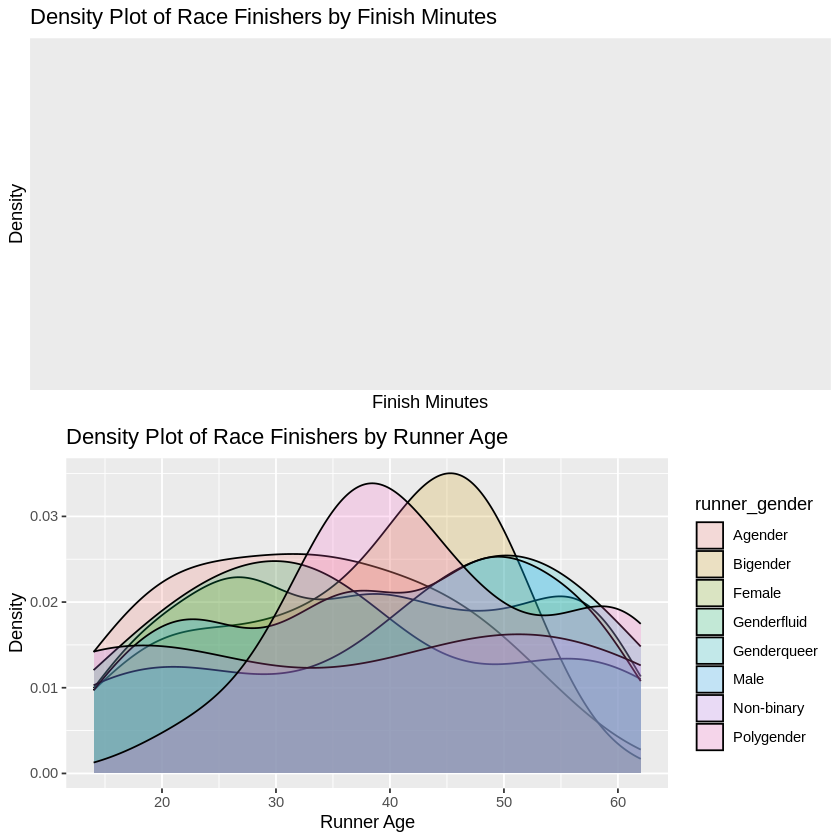

In [70]:
grid.arrange(plot1, plot2, nrow = 2)